In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv(r"C:\Users\KIIT0001\Downloads\titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X=df.drop(columns=['Survived'])
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=2)

In [10]:
X_train.shape,X_test.shape

((178, 3), (713, 3))

In [11]:
X_train.isnull().mean()

Age       0.185393
Fare      0.056180
Family    0.000000
dtype: float64

In [14]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [20]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [21]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
483,63.0,9.5875,0,63.0,63.000000,9.5875,9.5875
635,28.0,13.0000,0,28.0,28.000000,13.0000,13.0000
168,NaN,25.9250,0,28.0,30.182207,25.9250,25.9250
628,26.0,7.8958,0,26.0,26.000000,7.8958,7.8958
661,40.0,7.2250,0,40.0,40.000000,7.2250,7.2250


In [22]:
print('Original Age variable variance: ',X_train['Age'].var())
print('Age Variance after median imputation: ',X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  248.2920159291188
Age Variance after median imputation:  202.72352095473886
Age Variance after mean imputation:  202.00028414572378
Original Fare variable variance:  3688.583845975677
Fare Variance after median imputation:  3510.947074133453
Fare Variance after mean imputation:  3480.18927840643


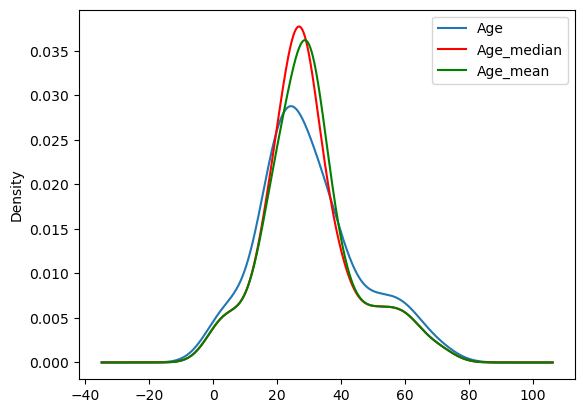

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_median'].plot(kind='kde',ax=ax,color='red')
X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

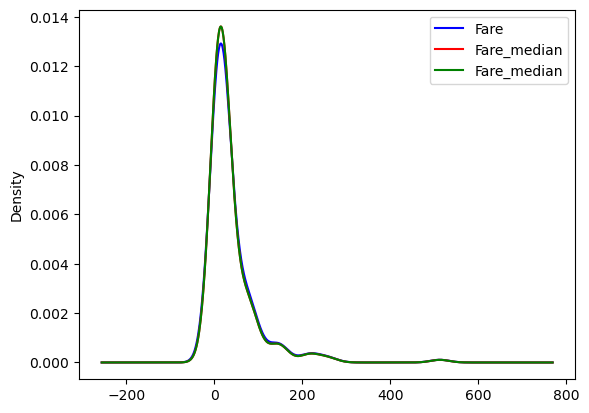

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax,color='blue')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')
ax.legend(loc='best')

plt.show()

In [30]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,248.292016,129.668618,-5.139801,248.292016,248.292016,127.280119,122.839024
Fare,129.668618,3688.583846,19.066040,109.543961,105.921075,3688.583846,3688.583846
Family,-5.139801,19.066040,3.140735,-4.301635,-4.181533,18.636819,17.988863
Age_median,248.292016,109.543961,-4.301635,202.723521,202.000284,107.011381,103.355036
Age_mean,248.292016,105.921075,-4.181533,202.000284,202.000284,103.549927,99.936833
Fare_median,127.280119,3688.583846,18.636819,107.011381,103.549927,3510.947074,3480.189278
Fare_mean,122.839024,3688.583846,17.988863,103.355036,99.936833,3480.189278,3480.189278


In [31]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.128448,-0.236539,1.000000,1.000000,0.130242,0.126279
Fare,0.128448,1.000000,0.173143,0.125505,0.121605,1.000000,1.000000
Family,-0.236539,0.173143,1.000000,-0.170477,-0.166014,0.177478,0.172063
Age_median,1.000000,0.125505,-0.170477,1.000000,0.998215,0.126843,0.123049
Age_mean,1.000000,0.121605,-0.166014,0.998215,1.000000,0.122959,0.119192
Fare_median,0.130242,1.000000,0.177478,0.126843,0.122959,1.000000,0.995610
Fare_mean,0.126279,1.000000,0.172063,0.123049,0.119192,0.995610,1.000000


<Axes: >

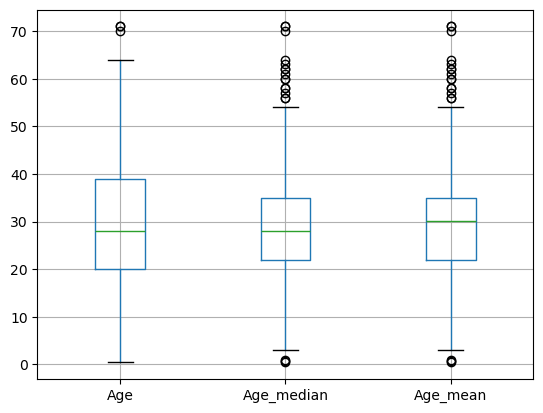

In [32]:
X_train[['Age','Age_median','Age_mean']].boxplot()


<Axes: >

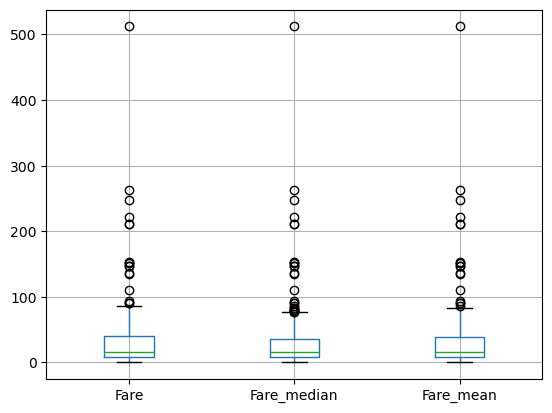

In [33]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

Using Sklearn

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [41]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough', force_int_remainder_cols=False)

In [42]:
trf.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [44]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [45]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [46]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [47]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])